#1. Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My\ Drive/Fashion


/content/gdrive/My Drive/Fashion


#2. Functions

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import svm

In [ ]:
def load_data_from_csv(file_path):
    '''
    Load data from csv file

    :return: [images, labels]
    '''

    dataframe = pd.read_csv(file_path)
    dataset = np.array(dataframe)
    labels = dataset[:, 0]
    images = dataset[:, 1:]

    return images, labels

In [ ]:
def pca_reduction(train_images, test_images, target_dim):
    '''
    Dimension reduction with PCA

    '''
    print("Starting PCA...")

    pca = PCA(n_components=target_dim)
    print("PCA target dimension: ", pca.n_components)

    pca.fit(train_images)
    # Reduction
    reduced_train_images = pca.transform(train_images)
    reduced_test_images = pca.transform(test_images)

    print("PCA done!")

    return reduced_train_images, reduced_test_images


In [ ]:
def svm_classify(train_images, train_labels, test_images, test_labels):

    print("Starting SVM with polynomial kernel...")
    svm_classifier = svm.SVC(kernel='poly')

    # Fit SVM with train set
    svm_classifier.fit(train_images, train_labels)
    print("SVM done!")

    accuracy = tf.keras.metrics.Accuracy()

    # Validation on train set
    preds_train_set = svm_classifier.predict(train_images)
    accuracy.update_state(train_labels, preds_train_set)
    acc_train_set = accuracy.result().numpy()
    print("Accuracy on train set: ", acc_train_set)
    accuracy.reset_states()

    # Validation on test set
    preds_test_set = svm_classifier.predict(test_images)
    accuracy.update_state(test_labels, preds_test_set)
    acc_test_set = accuracy.result().numpy()
    print("Accuracy on test set: ", acc_test_set)
    accuracy.reset_states()

    return  svm_classifier

#3. Load dataset

In [ ]:
(train_images, train_labels) = load_data_from_csv("dataset/fashion-mnist_train.csv")
(test_images, test_labels) = load_data_from_csv("dataset/fashion-mnist_test.csv")

print("Train set: {} images".format(len(train_images)))
print("Test set: {} images\n".format(len(test_images)))

# Convert images to range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

Train set: 60000 images
Test set: 10000 images



#4. Run SVM with different PCA dimensions

In [ ]:
# PCA dimension: 30

reduced_train_images, reduced_test_images = pca_reduction(train_images, test_images, 30)
svm_classifier_30d = svm_classify(reduced_train_images, train_labels, reduced_test_images, test_labels)

Starting PCA...
PCA target dimension:  30
PCA done!
Starting SVM with polynomial kernel...
SVM done!
Accuracy on train set:  0.87698334
Accuracy on test set:  0.869


In [ ]:
# PCA dimension: 50

reduced_train_images, reduced_test_images = pca_reduction(train_images, test_images, 50)
svm_classifier_50d = svm_classify(reduced_train_images, train_labels, reduced_test_images, test_labels)

Starting PCA...
PCA target dimension:  50
PCA done!
Starting SVM with polynomial kernel...
SVM done!
Accuracy on train set:  0.89015
Accuracy on test set:  0.8808


In [ ]:
# PCA dimension: 100

reduced_train_images, reduced_test_images = pca_reduction(train_images, test_images, 100)
svm_classifier_100d = svm_classify(reduced_train_images, train_labels, reduced_test_images, test_labels)

Starting PCA...
PCA target dimension:  100
PCA done!
Starting SVM with polynomial kernel...
SVM done!
Accuracy on train set:  0.9047667
Accuracy on test set:  0.8882


In [ ]:
# PCA dimension: 200

reduced_train_images, reduced_test_images = pca_reduction(train_images, test_images, 200)
svm_classifier_200d = svm_classify(reduced_train_images, train_labels, reduced_test_images, test_labels)

Starting PCA...
PCA target dimension:  200
PCA done!
Starting SVM with polynomial kernel...
SVM done!
Accuracy on train set:  0.91325
Accuracy on test set:  0.8919


In [ ]:
# PCA dimension: 300

reduced_train_images, reduced_test_images = pca_reduction(train_images, test_images, 300)
svm_classifier_300d = svm_classify(reduced_train_images, train_labels, reduced_test_images, test_labels)

Starting PCA...
PCA target dimension:  300
PCA done!
Starting SVM with polynomial kernel...
SVM done!
Accuracy on train set:  0.91735
Accuracy on test set:  0.893


In [ ]:
# PCA dimension: 400

reduced_train_images, reduced_test_images = pca_reduction(train_images, test_images, 400)
svm_classifier_400d = svm_classify(reduced_train_images, train_labels, reduced_test_images, test_labels)

Starting PCA...
PCA target dimension:  400
PCA done!
Starting SVM with polynomial kernel...
SVM done!
Accuracy on train set:  0.91905
Accuracy on test set:  0.892


In [ ]:
# PCA dimension: 500

reduced_train_images, reduced_test_images = pca_reduction(train_images, test_images, 500)
svm_classifier_500d = svm_classify(reduced_train_images, train_labels, reduced_test_images, test_labels)

Starting PCA...
PCA target dimension:  500
PCA done!
Starting SVM with polynomial kernel...
SVM done!
Accuracy on train set:  0.9205833
Accuracy on test set:  0.8923


#5. Inference

In [ ]:
# As above, SVM with 300-dimensions input has the highest accuracy on Test set
# PCA dimension: 300

reduced_train_images, reduced_test_images = pca_reduction(train_images, test_images, 300)

Starting PCA...
PCA target dimension:  300
PCA done!


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
id = np.random.randint(0, 10000, 25) # get 25 random images from Test set

images = test_images[id]
reduced_images = reduced_test_images[id] # Get dimension-reduced images to predict

labels = svm_classifier_300d.predict(reduced_images)

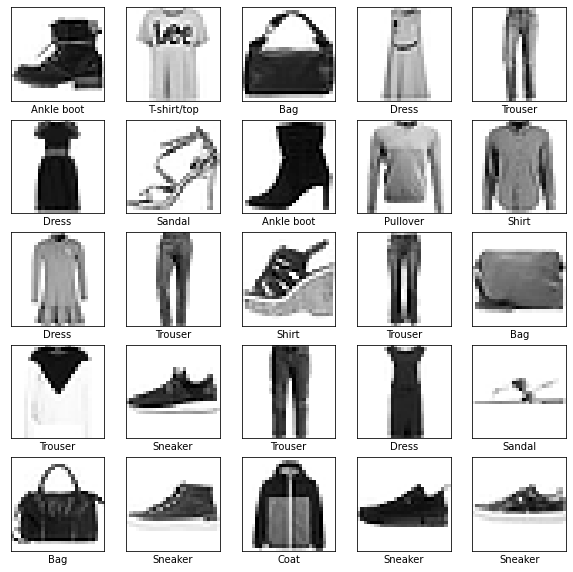

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(images[i], (28, 28)), cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i]])
plt.show()

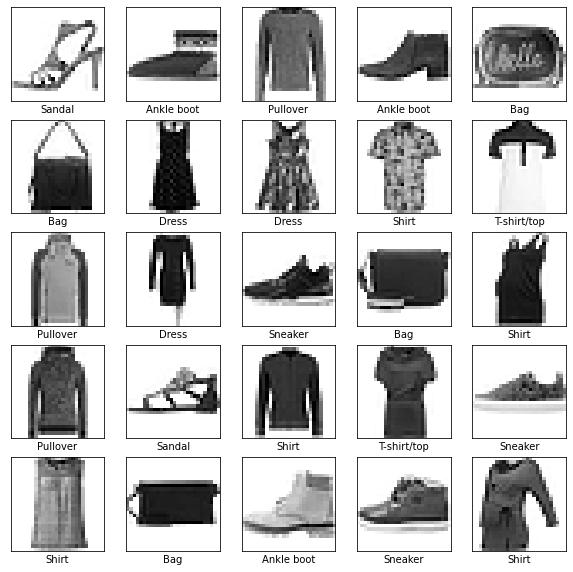

In [ ]:
id = np.random.randint(0, 10000, 25) # get 25 random images from Test set

images = test_images[id]
reduced_images = reduced_test_images[id] # Get dimension-reduced images to predict

labels = svm_classifier_300d.predict(reduced_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(images[i], (28, 28)), cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i]])
plt.show()

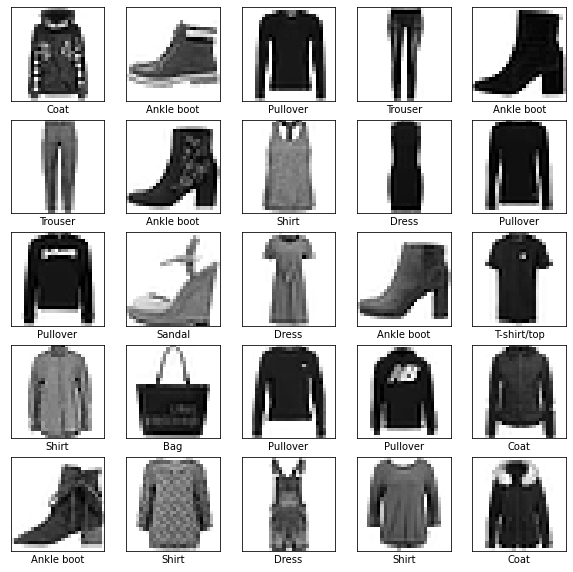

In [ ]:
id = np.random.randint(0, 10000, 25) # get 25 random images from Test set

images = test_images[id]
reduced_images = reduced_test_images[id] # Get dimension-reduced images to predict

labels = svm_classifier_300d.predict(reduced_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(images[i], (28, 28)), cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i]])
plt.show()